<a href="https://colab.research.google.com/github/cindy840823/Weather-Analysis/blob/main/Weather_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Data Fetch and Analysis
## **Introduction**

This project uses Python to fetch, analyze, and visualize real-time weather data using the OpenWeatherMap API. It highlights essential skills for Data Analyst and Data Scientist roles, including data analysis, visualization, and interactivity. This notebook is designed to be run entirely in Google Colab.

## **Goals**
- Fetch and analyze real-time weather data for multiple cities using REST APIs.

- Perform statistical analysis on key weather metrics such as temperature and humidity.

- Visualize weather patterns using bar charts.

- Enable interactive exploration of city-specific weather data.

- Showcase Python programming, data analysis, and visualization skills.

In [ ]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

## **Methodology**
### Step 1: Fetch Weather Data
Fetch and process weather data for multiple cities using the OpenWeatherMap API. Extract key metrics such as:

- Temperature (°C)

- Humidity (%)

- Weather description

In [ ]:
api_key = "ae01ae487dc68e621887e51029426593"
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

In [ ]:
# List of cities to fetch weather data
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"]

In [ ]:
def fetch_weather_data(city):
    params = {"q": city, "appid": api_key}
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            "City": city,
            "Temperature (C)": data['main']['temp'] - 273.15,
            "Humidity (%)": data['main']['humidity'],
            "Weather": data['weather'][0]['description'],
        }
    else:
        print(f"Failed to fetch data for {city}: {response.status_code}")
        return None

In [ ]:
# Fetch weather data for all cities
weather_data = []
for city in cities:
    data = fetch_weather_data(city)
    if data:
        weather_data.append(data)
    time.sleep(1)  # To avoid hitting API rate limits

In [ ]:
# Convert to DataFrame
df_weather = pd.DataFrame(weather_data)
print("Weather Data:")
print(df_weather)

Weather Data:
          City  Temperature (C)  Humidity (%)          Weather
0     New York            -0.76            41        clear sky
1  Los Angeles            18.66            23        clear sky
2      Chicago            -8.85            61       few clouds
3      Houston            10.85            71  overcast clouds
4      Phoenix            18.54            13        clear sky


### Step 2: Statistical Analysis

Perform statistical analysis to summarize weather data and calculate correlations.

In [ ]:
# Statistical Summary
print("Statistical Summary:")
print(df_weather.describe())

Statistical Summary:
       Temperature (C)  Humidity (%)
count         5.000000       5.00000
mean          7.688000      41.80000
std          12.176033      24.51938
min          -8.850000      13.00000
25%          -0.760000      23.00000
50%          10.850000      41.00000
75%          18.540000      61.00000
max          18.660000      71.00000


In [ ]:
# Correlation Analysis (on numeric columns only)
numeric_columns = df_weather.select_dtypes(include=["float", "int"])
correlation = numeric_columns.corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
                 Temperature (C)  Humidity (%)
Temperature (C)         1.000000     -0.617363
Humidity (%)           -0.617363      1.000000


### Step 3: Data Visualization
Visualize weather patterns across cities using bar charts for temperature and humidity.

**Temperature Bar Chart:**

<ipython-input-39-23ad0500e185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Temperature (C)", data=df_weather, palette="coolwarm")


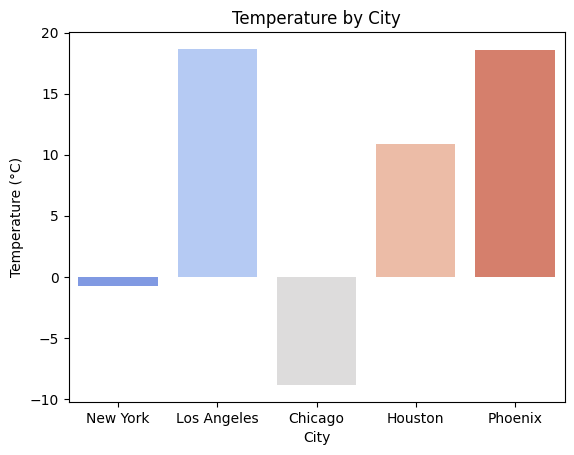

In [ ]:
# Bar chart for temperature
sns.barplot(x="City", y="Temperature (C)", data=df_weather, palette="coolwarm")
plt.title("Temperature by City")
plt.ylabel("Temperature (°C)")
plt.xlabel("City")
plt.show()

**Humidity Bar Chart:**

<ipython-input-41-28c5f164fdb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Humidity (%)", data=df_weather, palette="Blues")


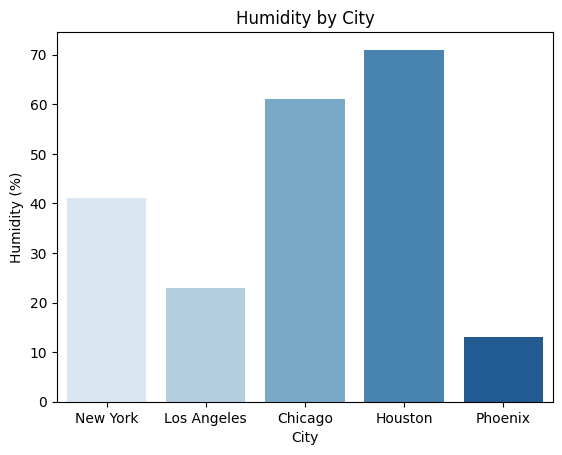

In [ ]:
# Bar chart for humidity
sns.barplot(x="City", y="Humidity (%)", data=df_weather, palette="Blues")
plt.title("Humidity by City")
plt.ylabel("Humidity (%)")
plt.xlabel("City")
plt.show()

### Step 4: Interactive Exploration
Enable interactive exploration of city-specific weather data using widgets.

In [ ]:
# Interactive City Selection
def show_city_weather(selected_city):
    city_data = df_weather[df_weather["City"] == selected_city]
    if not city_data.empty:
        print(city_data.to_string(index=False))
        plt.bar(["Temperature (C)", "Humidity (%)"],
                [city_data["Temperature (C)"].values[0], city_data["Humidity (%)"].values[0]],
                color=["blue", "green"])
        plt.title(f"Weather in {selected_city}")
        plt.show()

interact(show_city_weather, selected_city=cities)

interactive(children=(Dropdown(description='selected_city', options=('New York', 'Los Angeles', 'Chicago', 'Ho…

<function __main__.show_city_weather(selected_city)>

##**Conclusion**
This project demonstrates the ability to fetch, analyze, and visualize real-time data using APIs. It showcases skills in data analysis, visualization, and interactivity, making it a strong portfolio piece for Data Analyst and Data Scientist roles.

##**Future Enhancements**
- Include additional metrics such as wind speed and precipitation.

- Analyze historical weather data for trend detection and forecasting.

- Automate updates using scheduled scripts.

## **How to Run the Project**
1. Install dependencies: !pip install requests matplotlib seaborn pandas

2. Replace your_api_key_here in the code with your OpenWeatherMap API key.

3. Run the notebook cells in sequence to fetch, analyze, and visualize weather data.